[358.52179264]
(0.10000000000000217, 7389.105719598524, 7429.374720110025, 7411.477386549358, 7406.790476740315)
[7385.47061498]
7365.52043140127
7319.408080708489
7269.352278435639
7215.015787158673
7156.032529469622
7092.005121629103
7022.502196300902
6947.055496331261
6865.156719993002
6776.254096440176
6679.748668301277
6574.990256366017
6461.27307917882
6337.830998027227
6203.832355289618
6058.374371367014
5900.477062449792
5729.076638141931
5543.018334461046
5341.048633928509
5121.806820334605
4883.815811281241
4625.472206738948
4345.035486573025
4040.6162842600597
3710.163657792199
3351.4512720102966
2962.0623992731653
2539.3736374089985
2080.537235253059
1582.4619066947325
1041.7920039737774
454.8849099114889
-182.21350323694787
(0.09999999999999995, 116.99458002191072, -548.9996524737221, -253.00221580899643, -182.21350323694793)


Text(0, 0.5, '$location$')

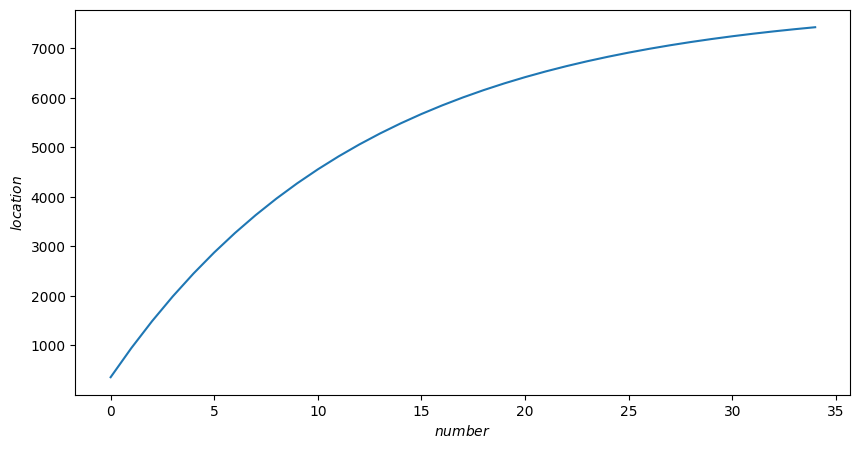

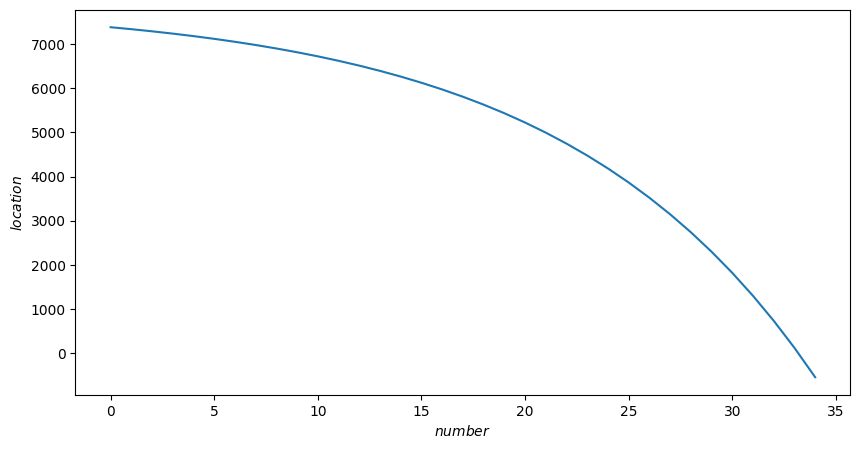

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Q3_BasicMath import calculate_Wn_1
from math import *
from scipy.optimize import fsolve

import random
# 用于记录每一个y_i的位置
line_positions = [0]
L = 1852 * 4
gamma = sin(np.radians(31.5)) / (sin(np.radians(31.5)) + sin(np.radians(28.5)))
step = 0.02*1852
simulate_times = 100

# 设置宽度左右两边的比例关系
west_width_percent = sin(radians(61.5))/(sin(radians(61.5))+sin(radians(58.5)))

# 设置计算出来的宽度
def detect_width(y_position):
    return calculate_Wn_1(y_position)


# 从前向后算
def Solvevalue_1(unsolvedvalue,edge):
    y = unsolvedvalue[0]
    edge = edge
    return [
        detect_width(y)*gamma - y + edge,
    ]
def Calculate_lines_1(y):
    line_positions[0]=y
    while line_positions[-1] <= L:
        width = detect_width(line_positions[-1])
        edge = line_positions[-1]+width*(1-gamma-0.1)
        # print(detect_width(edge)*gamma - edge)
        Solvevalue_1([0],edge)
        y_next = fsolve(Solvevalue_1,[0],args=edge)
        line_positions.append(y_next[0])
    temp1 = line_positions[len(line_positions)-2]
    temp2 = line_positions[-1]
    flag_last = temp1 + detect_width(temp1)*(1-gamma)
    flag_next = temp2 - detect_width(temp2)*(gamma)
    ita = (flag_last-flag_next)/ detect_width(temp1)
    return ita,temp1,temp2,flag_last,flag_next

# 从后向前算
def Solvevalue_2(unsolvedvalue,edge):
    y = unsolvedvalue[0]
    edge = edge
    return [
        detect_width(y)*(1-gamma) + y - edge,
    ]
def Calculate_lines_2(y):
    line_positions[0]=y
    while line_positions[-1] >= 0:
        width = detect_width(line_positions[-1])
        edge = line_positions[-1]-width*(gamma-0.1)
        print(edge)
        Solvevalue_2([0],edge)
        y_next = fsolve(Solvevalue_2,[0],args=edge)
        line_positions.append(y_next[0])
    temp1 = line_positions[len(line_positions)-2]
    temp2 = line_positions[-1]
    flag_last = temp1 - detect_width(temp1)*gamma
    flag_next = temp2 + detect_width(temp2)*(1-gamma)
    ita = (flag_next-flag_last)/ detect_width(temp1)
    return ita,temp1,temp2,flag_last,flag_next


Solvevalue_1([0],0)
solved = fsolve(Solvevalue_1,[0],args=0)
print(solved)
print(Calculate_lines_1(solved[0]))
plt.figure(figsize=(10,5))
plt.plot(line_positions)
plt.xlabel('$number$')
plt.ylabel('$location$')

line_positions=[0]
Solvevalue_2([0],L)
solved = fsolve(Solvevalue_2,[0],args=L)
print(solved)
print(Calculate_lines_2(solved[0]))
plt.figure(figsize=(10,5))
plt.plot(line_positions)
plt.xlabel('$number$')
plt.ylabel('$location$')

In [7]:
# 实现PCA分析和法向量计算，并加载数据集中的文件进行验证
import open3d as o3d
import os
import numpy as np
from pyntcloud import PyntCloud
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def PCA(data, correlation=False, sort=True):
    # data => (10000, 3)  data_mean => (1, 3)
    data_mean = np.mean(data, axis=0)  # 对列求均值
    # normalize_data => (10000, 3)
    normalize_data = data - data_mean  # 数据归一化操作
    # H => (3, 3)
    H = np.dot(normalize_data.transpose(), normalize_data)
    # eigenvectors => (3,3)  eigenvalues => (3,)  eigenvectors_transpose => (3,3)
    eigenvectors, eigenvalues, eigenvectors_transpose = np.linalg.svd(H)  # SVD分解
    # 将特征值从大到小进行排序，便于提取主成分向量
    if sort:
        sort = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[sort]
        eigenvectors = eigenvectors[:, sort]

    return eigenvalues, eigenvectors, normalize_data


def SetNormalVector():
    raw_point_cloud_matrix = np.loadtxt('C:\\Users\\Slater\\Desktop\\Math\\Coding_Material\\data.txt')
    raw_point_cloud_matrix_part = raw_point_cloud_matrix[:,0:3]
    raw_point_cloud = DataFrame(raw_point_cloud_matrix_part)  # 选取每一列的第0至第2个元素
    raw_point_cloud.columns = ['x', 'y', 'z']
    point_cloud_pynt = PyntCloud(raw_point_cloud)
    point_cloud_o3d = point_cloud_pynt.to_instance("open3d", mesh=False)
    eigenvalues, eigenvectors, normalize_data = PCA(raw_point_cloud_matrix_part)
    vector = np.mat(eigenvectors[:, 0:2])
    vector_transpose = vector.transpose()
    primary_orientation_ = eigenvectors[:, 0]
    second_orientation = eigenvectors[:, 1]
    point = [[0, 0, 0], primary_orientation_, second_orientation]
    lines = [[0, 1], [0, 2]]
    colors = [[1, 0, 0], [0, 1, 0]]
    line_set = o3d.geometry.LineSet(points=o3d.utility.Vector3dVector(point), lines=o3d.utility.Vector2iVector(lines))
    line_set.colors = o3d.utility.Vector3dVector(colors)
    # 循环计算每个点的法向量
    # *********************************************************************************
    # 从点云中获取点，只对点进行处理
    points = point_cloud_pynt.points
    print('total points number is:', points.shape[0])
    normals = []
    # 由于最近邻搜索，此处允许直接调用open3d中的函数
    pcd_tree = o3d.geometry.KDTreeFlann(point_cloud_o3d)
    # 每一点的法向量计算，通过PCA降维，对应最小特征值的成分向量近似为法向量
    for i in range(points.shape[0]):
        [_, idx, _] = pcd_tree.search_knn_vector_3d(point_cloud_o3d.points[i], 15)
        k_nearest_point = np.asarray(point_cloud_o3d.points)[idx, :]
        w, v, _ = PCA(k_nearest_point)
        normals.append(v[:, 2])
        #if i%100==0:
        #    print(normals[i])

    normals = np.array(normals, dtype=np.float64)
    # TODO: 此处把法向量存放在了normals中
    point_cloud_o3d.normals = o3d.utility.Vector3dVector(normals)
    # 法向量可视化，根据open3d文档，需要在显示窗口按住键'n'才可以看到法向量
    #o3d.visualization.draw_geometries([point_cloud_o3d])
    return normals

normals = SetNormalVector()
print(normals)

total points number is: 50451
[[-0.00203686 -0.00728779  0.99997137]
 [-0.00207146 -0.00722522  0.99997175]
 [-0.00202478 -0.00713623  0.99997249]
 ...
 [-0.00518343 -0.00575937  0.99996998]
 [-0.00541387 -0.00578715  0.9999686 ]
 [-0.00541219 -0.00569566  0.99996913]]


In [17]:
from Q4_Map_Modeling import *
from math import *
from Q4_SetNormalVector import *
import numpy as np 
# 基本参数设置
theta = radians(120)  # 表示测量张角
alpha = np.zeros((251,201))  # 表示海底平面斜坡坡度
beta = np.zeros((251,201))  # 表示法向量的投影和测线方向的夹角
alpha_ = np.zeros((251,201))  # 表示等效的\alpha大小
gamma = np.zeros((251,201))  # 表示宽度在当前行进方向的左右分布系数（表示deep的部分）
Height = 5 * 1852  # 表示的是地图的长度（单位：m）x
Width = 4 * 1852  # 表示的是地图的宽度（单位：m）y
Step = 0.02 * 1852  # 表示的是各单位的移动步长（单位：m）
Map = Map()  # 初始化扫描地图
Ita = []  # 记录出现过的重复率
W = np.zeros((251,201)) # 表示存储宽度的矩阵
# 记录从什么位置进行寻路

# 定位参数设置 注意这里输入的是对应的模块坐标
def Get_width(theta,x_position, y_position, gamma):
    raw = x_position 
    col = y_position 
    raw = int(raw)
    col = int(col)
    width = Calculate_W(theta,raw,col)  # 这里需要加上对应的函数
    Map.set_width_map(raw, col, width*gamma[raw,col], width*(1-gamma[raw,col]))
    return raw, col, width*gamma[raw,col], width*(1-gamma[raw,col])



# 寻路算法
def find_path(Direction):
    if (Direction == 'Verticle'):
        left_edge = 0
        right_edge = Width
        
        for col in range(0, 201):
            road_map = Map.road_map  # 得到路径地图
            for raw in range(0, 251):
                # col = i // Step  # 设置对应的列
                # raw = j // Step  # 设置对应的行
                i = col * Step
                j = raw * Step
                raw = int(raw)
                col = int(col)
                # TODO:检查当前区域是否被检测到过
                if Map.valid_map[raw][col] == 0:
                    road_map[raw][col] = 1  # 设置当前的节点为路径节点
                    width = Map.get_width_by_raw_and_col(raw, col)  # 得到宽度
                    left_area = width[0] // Step + 1  if (width[0] // Step) * Step < width[0] else width[0] // Step# 得到左侧宽度
                    right_area = width[1] // Step + 1 if (width[1] // Step) * Step < width[1] else width[1] // Step# 得到右侧宽度
                    left_edge_math = i - width[0] if i > width[0] else 0 # 表示左侧的具体值
                    right_edge_math = i + width[1] if i + width[1] <Width else Width # 表示右侧的具体值
                    left_edge = col - left_area if col > left_area else 0  # 左位置
                    right_edge = col + right_area if col + right_area < Width // Step else (Width // Step)-1  # 右位置
                    left_edge = int(left_edge)
                    right_edge = int(right_edge)
                    # TODO:找到并修改成已经检查的区域块
                    change_node = np.arange(left_edge, right_edge+1)
                    for c in change_node:
                        Map.set_valid_map(raw, c)

                    # TODO:检查重叠率
                    for t in range(left_edge, col):
                        if (road_map[raw][t] == 1):
                            left_node_width = Map.get_width_by_raw_and_col(raw, t)
                            ita = (t*Step+left_node_width[1]-(i-left_edge_math)) / (left_node_width[0]+left_node_width[1])
                            if ita >= 0.2:
                                break
                            else:
                                if (t == Height):
                                    Map.road_map = road_map
                            Ita.append(ita)
                else:
                    break
        return
    elif (Direction == "Horizen"):
        for j in np.arange(0, Height+1, Step):
            road_map = Map.road_map  # 得到路径地图
            for i in np.arange(0, Width+1, Step):
                col = i // Step  # 设置对应的列
                raw = j // Step  # 设置对应的行

                # 检查当前区域是否被检测到过
                if (Map.valid_map[raw][col] == 0):
                    road_map[raw][col] = 1  # 设置当前的节点为路径节点
                    width = Map.get_width_by_raw_and_col(raw, col)  # 得到宽度
                    up_area = width[0] // Step  # 得到左侧宽度
                    down_area = width[1] // Step  # 得到右侧宽度
                    up_edge = col - up_edge if col > up_area else 0  # 左位置
                    down_edge = col + down_edge if col + \
                        down_area < Height//Step else Height//Step-1  # 右位置

                    # 找到并修改成已经检查的区域块
                    change_node = np.arange(down_edge, up_edge)
                    Map.set_valid_map(change_node, col)

                    # 检查重叠率
                    for t in range(down_edge, raw):
                        if (road_map[t][col] == 1):
                            down_node_width = Map.get_width_by_raw_and_col(
                                t, col)
                            ita = (t + down_node_width[1]-down_edge) / \
                                (down_node_width[0] + down_node_width[1])
                            if ita >= 0.2:
                                break
                            else:
                                if (t == Width):
                                    Map.road_map = road_map
                            Ita.append(ita)
                else:
                    break
        return

def ReadVectors():
    normals = set_normal_vector()
    for i in range(len(normals)):
        raw = i // 201
        col = i % 201
        Map.vector_map[raw][col]=normals[i]
    return normals

def Calculate_alpha_beta(Normal_vector,Direction):
    line_direction = np.zeros(3)
    if(Direction == "Verticle"):
        line_direction = np.array((1,0,0))
    elif(Direction == "Horizen"):
        line_direction = np.array((0,1,0))
    z = np.array((0,0,1))
    b = np.array((Normal_vector[0],Normal_vector[1],0))
    n = np.array((Normal_vector[0],Normal_vector[1],Normal_vector[2]))
    cal_beta = Calculate_angle(line_direction,b)
    # print(z)
    # print(n)
    cal_alpha = Calculate_angle(n,z)
    return cal_beta,cal_alpha
    
def Calculate_angle(vector1,vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    l_x = sqrt(vector1.dot(vector1))
    l_y = sqrt(vector2.dot(vector2))
    dian = vector1.dot(vector2)
    cos_ = dian / (l_x * l_y)
    angle = acos(cos_)
    return angle

def Calculate_W(theta,raw,col):
    D = Map.depth
    w = sin(theta)*cos(alpha_[raw,col])**2/(cos(theta/2-alpha_[raw,col])*cos(theta/2+alpha_[raw,col])) * D[raw,col]
    return w

def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功")


def Calculate_Width():
    ReadVectors()
    H = len(Map.vector_map)
    W_ = len(Map.vector_map[0])
    for i in range(H):
        for j in range(W_):
            alpha[i,j],beta[i,j] =Calculate_alpha_beta(Map.vector_map[i,j],"Verticle")
            alpha_[i,j] = atan(tan(alpha[i,j])*(sin(beta[i,j])))
            gamma[i,j] = cos(theta/2+alpha_[i,j])/(cos(theta/2+alpha_[i,j]) + cos(theta/2-alpha_[i,j])) 
            Get_width(theta,i,j,gamma)
    return Map.width_map

def ShowArray(array):
    array = np.array(array)
    for i in range(len(array)):
            print(array[i,:])

Calculate_Width()
find_path("Verticle")
ShowArray(Map.road_map)
# ShowArray(Ita)
ShowArray(Map.valid_map)
ShowArray(Map.road_map)

# map = Calculate_Width()
# print(map)

[[(44.34141686535555, 40.36895015355889)
  (43.76434858490237, 39.96242295349615)
  (43.2687427171005, 39.519841639875956) ...
  (440.805310277998, 269.6548000069443)
  (444.7965195967887, 272.6609837694921)
  (449.57196435048667, 275.3954986575374)]
 [(44.25046759462084, 40.191582546859)
  (43.68719923947326, 39.77334269227687)
  (43.07377813717969, 39.42894034320561) ...
  (438.4225038370086, 268.67959843723423)
  (443.0746007683422, 271.41539129864293)
  (447.3287563048033, 274.32317441467103)]
 [(44.15682034111887, 40.0481236083899)
  (43.624355619615265, 39.604331093580235)
  (43.041974205864626, 39.23352346029781) ...
  (436.06645337768475, 267.71753660019465)
  (440.5427144809102, 270.4968686029136)
  (445.3790677114535, 273.16313319195507)]
 ...
 [(144.07365439188993, 144.4518649060401)
  (144.11069577355153, 144.48409290184605)
  (144.16593595453878, 144.5327587388958) ...
  (115.96393599274441, 112.81406192760915)
  (115.5975130171636, 112.48672366035117)
  (115.2333619895715

In [18]:
from Q4_Map_Modeling import *
from math import *
from Q4_SetNormalVector import *
import numpy as np 
# 基本参数设置
theta = radians(120)  # 表示测量张角
alpha = np.zeros((251,201))  # 表示海底平面斜坡坡度
beta = np.zeros((251,201))  # 表示法向量的投影和测线方向的夹角
alpha_ = np.zeros((251,201))  # 表示等效的\alpha大小
gamma = np.zeros((251,201))  # 表示宽度在当前行进方向的左右分布系数（表示deep的部分）
Height = 5 * 1852  # 表示的是地图的长度（单位：m）x
Width = 4 * 1852  # 表示的是地图的宽度（单位：m）y
Step = 0.02 * 1852  # 表示的是各单位的移动步长（单位：m）
Map = Map()  # 初始化扫描地图
Ita = []  # 记录出现过的重复率
W = np.zeros((251,201)) # 表示存储宽度的矩阵
# 记录从什么位置进行寻路

# 定位参数设置 注意这里输入的是对应的模块坐标
def Get_width(theta,x_position, y_position, gamma):
    raw = x_position 
    col = y_position 
    raw = int(raw)
    col = int(col)
    width = Calculate_W(theta,raw,col)  # 这里需要加上对应的函数
    Map.set_width_map(raw, col, width*gamma[raw,col], width*(1-gamma[raw,col]))
    return raw, col, width*gamma[raw,col], width*(1-gamma[raw,col])



# 寻路算法
def find_path(Direction):
    if (Direction == 'Verticle'):
        left_edge = 0
        right_edge = Width
        
        for col in range(0, 201):
            road_map = Map.road_map  # 得到路径地图
            for raw in range(0, 251):
                # col = i // Step  # 设置对应的列
                # raw = j // Step  # 设置对应的行
                i = col * Step
                j = raw * Step
                raw = int(raw)
                col = int(col)
                # TODO:检查当前区域是否被检测到过
                if Map.valid_map[raw][col] == 0:
                    road_map[raw][col] = 1  # 设置当前的节点为路径节点
                    width = Map.get_width_by_raw_and_col(raw, col)  # 得到宽度
                    left_area = width[0] // Step + 1  if (width[0] // Step) * Step < width[0] else width[0] // Step# 得到左侧宽度
                    right_area = width[1] // Step + 1 if (width[1] // Step) * Step < width[1] else width[1] // Step# 得到右侧宽度
                    left_edge_math = i - width[0] # 表示左侧的具体值
                    right_edge_math = i + width[1] # 表示右侧的具体值
                    left_edge = col - left_area if col > left_area else 0  # 左位置
                    right_edge = col + right_area if col + right_area < Width // Step else (Width // Step)-1  # 右位置
                    left_edge = int(left_edge)
                    right_edge = int(right_edge)
                    # TODO:找到并修改成已经检查的区域块
                    change_node = np.arange(left_edge, right_edge+1)
                    for c in change_node:
                        Map.set_valid_map(raw, c)

                    # TODO:检查重叠率
                    for t in range(left_edge, col):
                        if (road_map[raw][t] == 1):
                            left_node_width = Map.get_width_by_raw_and_col(raw, t)
                            ita = (t*Step+left_node_width[1]-(i-left_edge_math)) / (left_node_width[0]+left_node_width[1])
                            if ita >= 0.2:
                                break
                            else:
                                if (t == Height):
                                    Map.road_map = road_map
                            Ita.append(ita)
                else:
                    break
        return
    elif (Direction == "Horizen"):
        for j in np.arange(0, Height+1, Step):
            road_map = Map.road_map  # 得到路径地图
            for i in np.arange(0, Width+1, Step):
                col = i // Step  # 设置对应的列
                raw = j // Step  # 设置对应的行

                # 检查当前区域是否被检测到过
                if (Map.valid_map[raw][col] == 0):
                    road_map[raw][col] = 1  # 设置当前的节点为路径节点
                    width = Map.get_width_by_raw_and_col(raw, col)  # 得到宽度
                    up_area = width[0] // Step  # 得到左侧宽度
                    down_area = width[1] // Step  # 得到右侧宽度
                    up_edge = col - up_edge if col > up_area else 0  # 左位置
                    down_edge = col + down_edge if col + \
                        down_area < Height//Step else Height//Step-1  # 右位置

                    # 找到并修改成已经检查的区域块
                    change_node = np.arange(down_edge, up_edge)
                    Map.set_valid_map(change_node, col)

                    # 检查重叠率
                    for t in range(down_edge, raw):
                        if (road_map[t][col] == 1):
                            down_node_width = Map.get_width_by_raw_and_col(
                                t, col)
                            ita = (t + down_node_width[1]-down_edge) / \
                                (down_node_width[0] + down_node_width[1])
                            if ita >= 0.2:
                                break
                            else:
                                if (t == Width):
                                    Map.road_map = road_map
                            Ita.append(ita)
                else:
                    break
        return

def ReadVectors():
    normals = set_normal_vector()
    for i in range(len(normals)):
        raw = i // 201
        col = i % 201
        Map.vector_map[raw][col]=normals[i]
    return normals

def Calculate_alpha_beta(Normal_vector,Direction):
    line_direction = np.zeros(3)
    if(Direction == "Verticle"):
        line_direction = np.array((1,0,0))
    elif(Direction == "Horizen"):
        line_direction = np.array((0,1,0))
    z = np.array((0,0,1))
    b = np.array((Normal_vector[0],Normal_vector[1],0))
    n = np.array((Normal_vector[0],Normal_vector[1],Normal_vector[2]))
    cal_beta = Calculate_angle(line_direction,b)
    # print(z)
    # print(n)
    cal_alpha = Calculate_angle(n,z)
    return cal_beta,cal_alpha
    
def Calculate_angle(vector1,vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    l_x = sqrt(vector1.dot(vector1))
    l_y = sqrt(vector2.dot(vector2))
    dian = vector1.dot(vector2)
    cos_ = dian / (l_x * l_y)
    angle = acos(cos_)
    return angle

def Calculate_W(theta,raw,col):
    D = Map.depth
    w = sin(theta)*cos(alpha_[raw,col])**2/(cos(theta/2-alpha_[raw,col])*cos(theta/2+alpha_[raw,col])) * D[raw,col]
    return w

def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功")


def Calculate_Width():
    ReadVectors()
    H = len(Map.vector_map)
    W_ = len(Map.vector_map[0])
    for i in range(H):
        for j in range(W_):
            alpha[i,j],beta[i,j] =Calculate_alpha_beta(Map.vector_map[i,j],"Verticle")
            alpha_[i,j] = atan(tan(alpha[i,j])*(sin(beta[i,j])))
            gamma[i,j] = cos(theta/2+alpha_[i,j])/(cos(theta/2+alpha_[i,j]) + cos(theta/2-alpha_[i,j])) 
            Get_width(theta,i,j,gamma)
    return Map.width_map

def ShowArray(array):
    array = np.array(array)
    for i in range(len(array)):
            print(array[i,:])


Calculate_Width()
map = Map.vector_map

In [20]:
from Q4_Map_Modeling import *
from math import *
from Q4_SetNormalVector import *
import numpy as np 
# 基本参数设置
theta = radians(120)  # 表示测量张角
alpha = np.zeros((251,201))  # 表示海底平面斜坡坡度
beta = np.zeros((251,201))  # 表示法向量的投影和测线方向的夹角
alpha_ = np.zeros((251,201))  # 表示等效的\alpha大小
gamma = np.zeros((251,201))  # 表示宽度在当前行进方向的左右分布系数（表示deep的部分）
Height = 5 * 1852  # 表示的是地图的长度（单位：m）x
Width = 4 * 1852  # 表示的是地图的宽度（单位：m）y
Step = 0.02 * 1852  # 表示的是各单位的移动步长（单位：m）
Map = Map()  # 初始化扫描地图
Ita = []  # 记录出现过的重复率
W = np.zeros((251,201)) # 表示存储宽度的矩阵
# 记录从什么位置进行寻路

# 定位参数设置 注意这里输入的是对应的模块坐标
def Get_width(theta,x_position, y_position, gamma):
    raw = x_position 
    col = y_position 
    raw = int(raw)
    col = int(col)
    width = Calculate_W(theta,raw,col)  # 这里需要加上对应的函数
    Map.set_width_map(raw, col, width*gamma[raw,col], width*(1-gamma[raw,col]))
    return raw, col, width*gamma[raw,col], width*(1-gamma[raw,col])



# 寻路算法
def find_path(Direction):
    if (Direction == 'Verticle'):
        left_edge = 0
        right_edge = Width
        
        for col in range(0, 201):
            road_map = Map.road_map  # 得到路径地图
            for raw in range(0, 251):
                i = col * Step
                j = raw * Step
                raw = int(raw)
                col = int(col)
                # TODO:检查当前区域是否被检测到过
                if Map.valid_map[raw][col] == 0:
                    road_map[raw][col] = 1  # 设置当前的节点为路径节点
                    width = Map.get_width_by_raw_and_col(raw, col)  # 得到宽度
                    left_area = width[0] // Step + 1  if (width[0] // Step) * Step < width[0] else width[0] // Step# 得到左侧宽度
                    right_area = width[1] // Step + 1 if (width[1] // Step) * Step < width[1] else width[1] // Step# 得到右侧宽度
                    left_edge_math = i - width[0] # 表示左侧的具体值
                    right_edge_math = i + width[1] # 表示右侧的具体值
                    left_edge = col - left_area if col > left_area else 0  # 左位置
                    right_edge = col + right_area if col + right_area < Width // Step else (Width // Step)-1  # 右位置
                    left_edge = int(left_edge)
                    right_edge = int(right_edge)
                    # TODO:找到并修改成已经检查的区域块
                    change_node = np.arange(left_edge, right_edge+1)
                    for c in change_node:
                        Map.set_valid_map(raw, c)

                    # TODO:检查重叠率
                    for t in range(left_edge, col):
                        if (road_map[raw][t] == 1):
                            left_node_width = Map.get_width_by_raw_and_col(raw, t)
                            ita = (t*Step+left_node_width[1]-(i-left_edge_math)) / (left_node_width[0]+left_node_width[1])
                            if ita >= 0.2:
                                break
                            else:
                                if (t == Height):
                                    Map.road_map = road_map
                            Ita.append(ita)
                else:
                    break
        return
    elif (Direction == "Horizen"):
        for j in np.arange(0, Height+1, Step):
            road_map = Map.road_map  # 得到路径地图
            for i in np.arange(0, Width+1, Step):
                col = i // Step  # 设置对应的列
                raw = j // Step  # 设置对应的行

                # 检查当前区域是否被检测到过
                if (Map.valid_map[raw][col] == 0):
                    road_map[raw][col] = 1  # 设置当前的节点为路径节点
                    width = Map.get_width_by_raw_and_col(raw, col)  # 得到宽度
                    up_area = width[0] // Step  # 得到左侧宽度
                    down_area = width[1] // Step  # 得到右侧宽度
                    up_edge = col - up_edge if col > up_area else 0  # 左位置
                    down_edge = col + down_edge if col + \
                        down_area < Height//Step else Height//Step-1  # 右位置

                    # 找到并修改成已经检查的区域块
                    change_node = np.arange(down_edge, up_edge)
                    Map.set_valid_map(change_node, col)

                    # 检查重叠率
                    for t in range(down_edge, raw):
                        if (road_map[t][col] == 1):
                            down_node_width = Map.get_width_by_raw_and_col(
                                t, col)
                            ita = (t + down_node_width[1]-down_edge) / \
                                (down_node_width[0] + down_node_width[1])
                            if ita >= 0.2:
                                break
                            else:
                                if (t == Width):
                                    Map.road_map = road_map
                            Ita.append(ita)
                else:
                    break
        return

def ReadVectors():
    normals = set_normal_vector()
    for i in range(len(normals)):
        raw = i // 201
        col = i % 201
        Map.vector_map[raw][col]=normals[i]
    return normals

def Calculate_alpha_beta(Normal_vector,Direction):
    line_direction = np.zeros(3)
    if(Direction == "Verticle"):
        line_direction = np.array((1,0,0))
    elif(Direction == "Horizen"):
        line_direction = np.array((0,1,0))
    z = np.array((0,0,1))
    b = np.array((Normal_vector[0],Normal_vector[1],0))
    n = np.array((Normal_vector[0],Normal_vector[1],Normal_vector[2]))
    cal_beta = Calculate_angle(line_direction,b)
    cal_alpha = Calculate_angle(n,z)
    return cal_beta,cal_alpha
    
def Calculate_angle(vector1,vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    l_x = sqrt(vector1.dot(vector1))
    l_y = sqrt(vector2.dot(vector2))
    dian = vector1.dot(vector2)
    cos_ = dian / (l_x * l_y)
    angle = acos(cos_)
    return angle

def Calculate_W(theta,raw,col):
    D = Map.depth
    w = sin(theta)*cos(alpha_[raw,col])**2/(cos(theta/2-alpha_[raw,col])*cos(theta/2+alpha_[raw,col])) * D[raw,col]
    return w

def text_save(filename, data):#filename为写入CSV文件的路径，data为要写入数据列表.
    file = open(filename,'a')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功")


def Calculate_Width():
    ReadVectors()
    H = len(Map.vector_map)
    W_ = len(Map.vector_map[0])
    for i in range(H):
        for j in range(W_):
            alpha[i,j],beta[i,j] =Calculate_alpha_beta(Map.vector_map[i,j],"Verticle")
            alpha_[i,j] = atan(tan(alpha[i,j])*(sin(beta[i,j])))
            gamma[i,j] = cos(theta/2+alpha_[i,j])/(cos(theta/2+alpha_[i,j]) + cos(theta/2-alpha_[i,j])) 
            Get_width(theta,i,j,gamma)
    return Map.width_map

def ShowArray(array):
    array = np.array(array)
    for i in range(len(array)):
            print(array[i,:])


# Calculate_Width()
# map = Map.width_map
# print(map)
# print(len(map),len(map[0]))
# find_path("Verticle")

x = np.array((0,0,1))
y = np.array((-0.00203685,-0.00728779,0.99997137))
z = np.array((0,1,0))

print(Calculate_angle(x,z))

1.5707963267948966
